In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'./DATA/Liver Disorders/bupa.data.csv' , header= None)
df.columns = ['Mcv' , 'Alkphos' , 'Sgpt' , 'Sgot' , 'Gammagt' , 'Drinks' , 'Selector']

print(f"DF shape :{df.shape}")

df.head()

DF shape :(345, 7)


,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


# EDA

In [3]:
# Total Summary

def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    
check_data(df, 'Train data')
print('-'*100)
# check_data(df_test, 'Test data')
# print('-'*100)
# check_data(original, 'Original data')

,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
0,85,92,45,27,31,0.000000,1
1,85,64,59,32,23,0.000000,2
2,86,54,33,16,54,0.000000,2
3,91,78,34,24,36,0.000000,2
4,87,70,12,28,10,0.000000,2


,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
Unique Value Count,26,78,67,47,94,16,2


,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mcv       345 non-null    int64  
 1   Alkphos   345 non-null    int64  
 2   Sgpt      345 non-null    int64  
 3   Sgot      345 non-null    int64  
 4   Gammagt   345 non-null    int64  
 5   Drinks    345 non-null    float64
 6   Selector  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [5]:
df.drop('Selector' , axis = 1 , inplace= True)

In [6]:
num_cols = df.select_dtypes(exclude=['object','category']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

# EDA

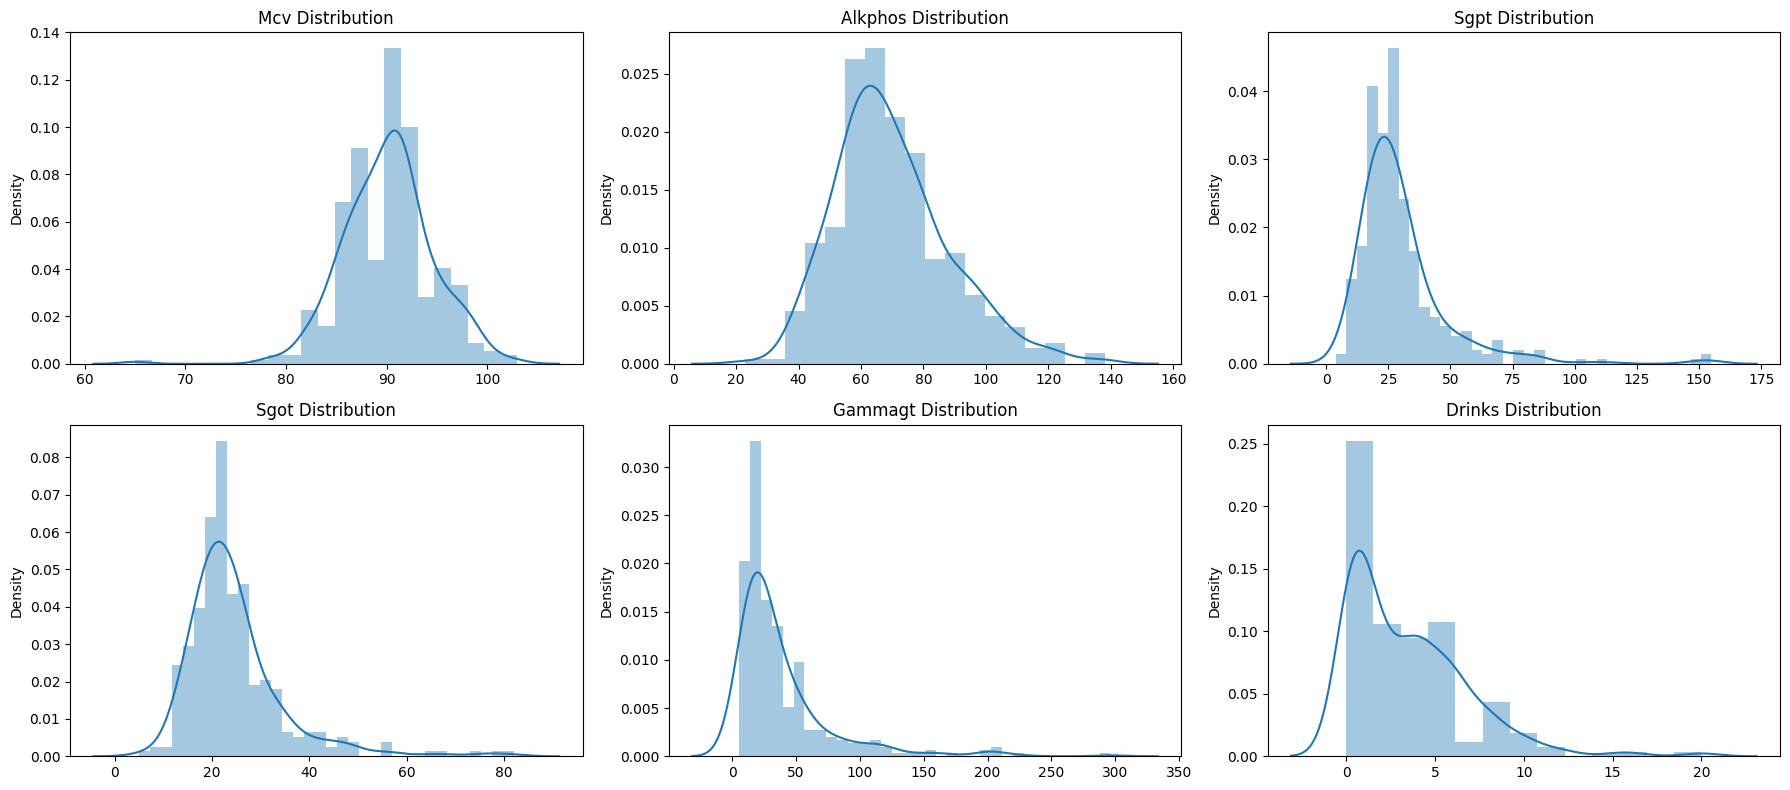

In [7]:
# Unsupervised EDA
import warnings

warnings.filterwarnings("ignore")

def plot_histograms(df, n_cols=3):
    n_rows = (len(df.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df[var_name], kde=True, ax=ax)
            ax.set_title(f'{var_name} Distribution')
            ax.set_xlabel('')
            ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

plot_histograms(df[num_cols], n_cols=3)

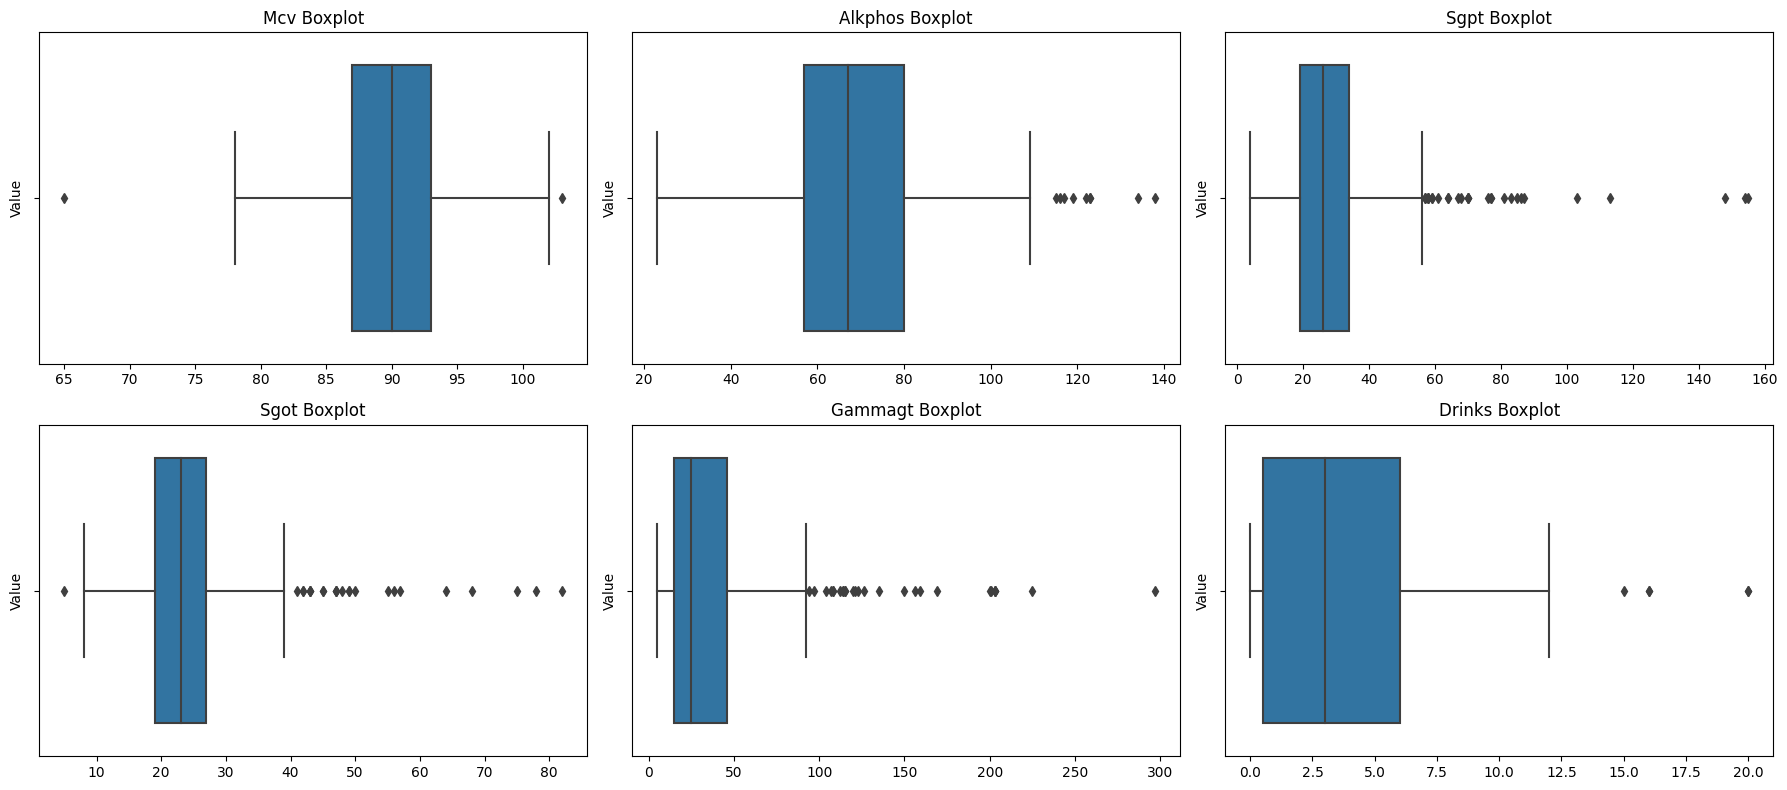

In [8]:
# Unsupervised EDA
def plot_boxplots(df, n_cols=3):
    n_rows = (len(df.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.boxplot(data=df, x=var_name, ax=ax)
            ax.set_title(f'{var_name} Boxplot')
            ax.set_xlabel('')
            ax.set_ylabel('Value')

    plt.tight_layout()
    plt.show()

plot_boxplots(df[num_cols], n_cols=3)

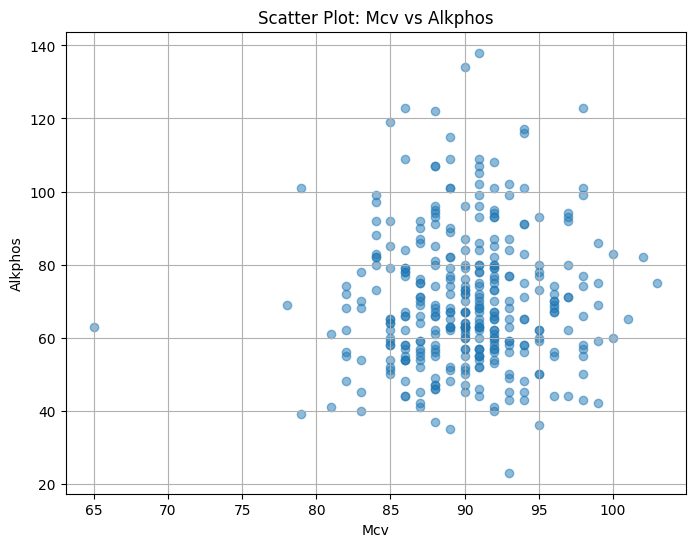

In [9]:
# Unsupervised EDA
def plot_scatter(df, x_var, y_var):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_var], df[y_var], alpha=0.5)
    plt.title(f'Scatter Plot: {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True)
    plt.show()

plot_scatter(df, 'Mcv', 'Alkphos')

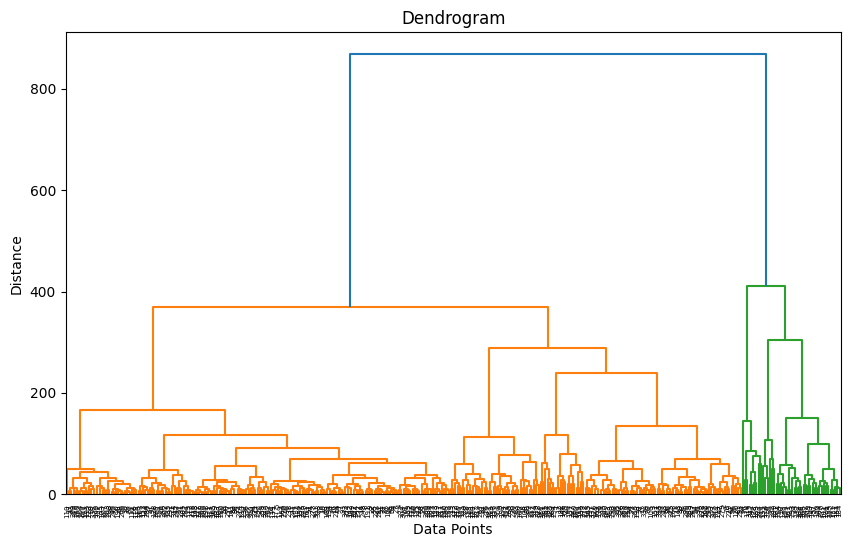

In [10]:
# Unsupervised EDA
import scipy.cluster.hierarchy as sch

def plot_dendrogram(df):
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(df) # 2 Clusters looking good.

# Modelling

## PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components= 2)

pca_result = pca.fit_transform(df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df

,PC1,PC2
0,-0.794014,22.670968
1,-5.568604,-4.362127
2,12.850626,-17.516366
3,-0.661029,8.228113
4,-31.651717,2.675232
...,...,...
340,2.015332,4.951257
341,164.625157,-14.143221
342,57.514191,3.239830
343,-23.397638,0.373944


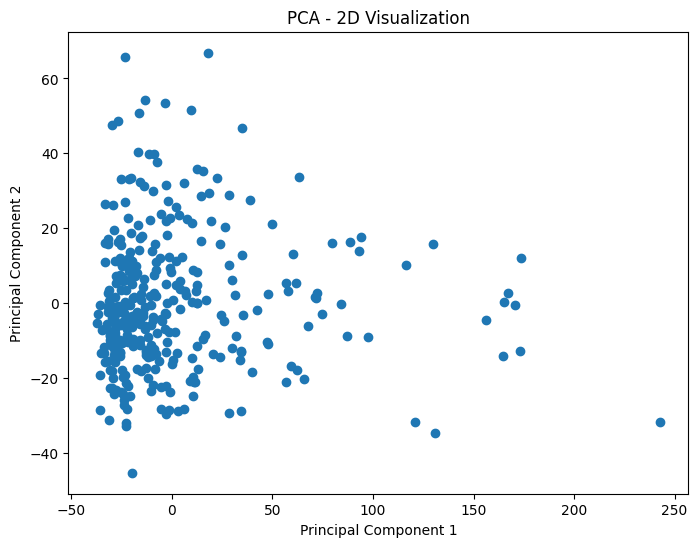

In [13]:
# Visualize the reduced data in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization')
plt.show()

### KMeans

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmean = KMeans(n_clusters = 2)

kmean.fit(df)

cluster_labels = kmean.labels_

# df['Clusters'] = cluster_labels

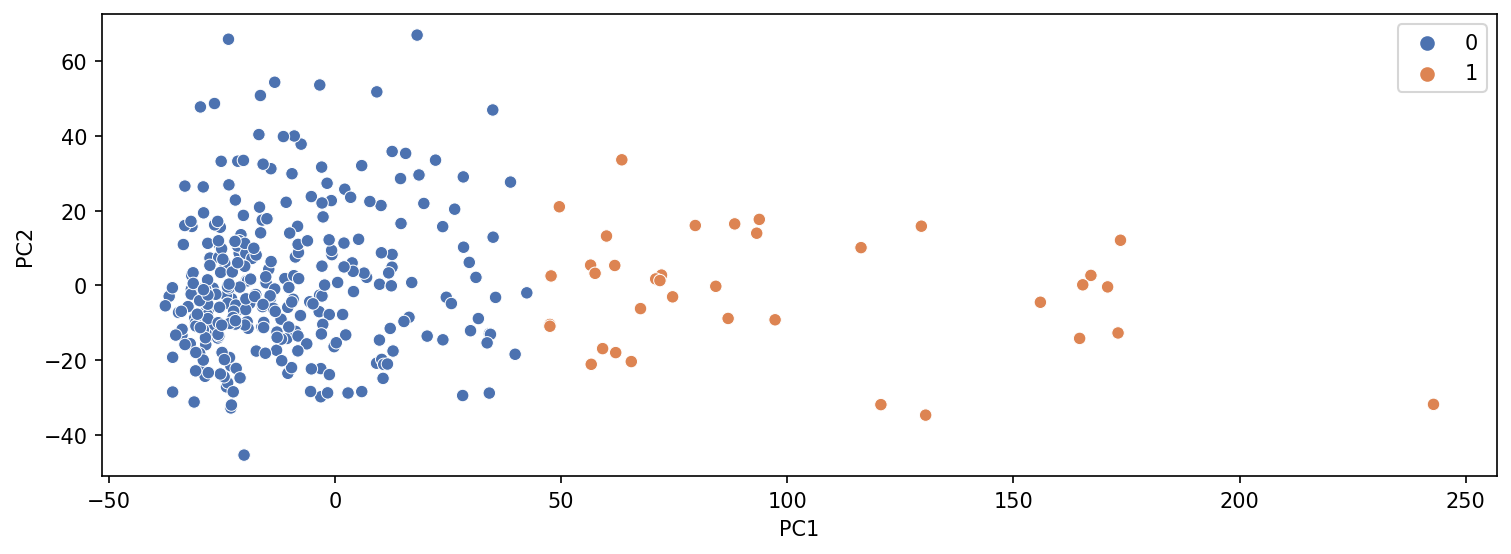

In [16]:
plt.figure(figsize= (12,4) , dpi= 150)

sns.scatterplot(data= pca_df , x = 'PC1' , y= 'PC2' , hue = cluster_labels , palette= 'deep'); # Features are just examples.

# # Visualize the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(df['Drinks'], df['Alkphos'], c=df['Clusters'], cmap='rainbow')
# plt.xlabel('Drinks')
# plt.ylabel('Alkphos')
# plt.title('KMeans Clustering')
# plt.show()

## Hierarchical Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster_labels = agglo.fit_predict(df)

cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

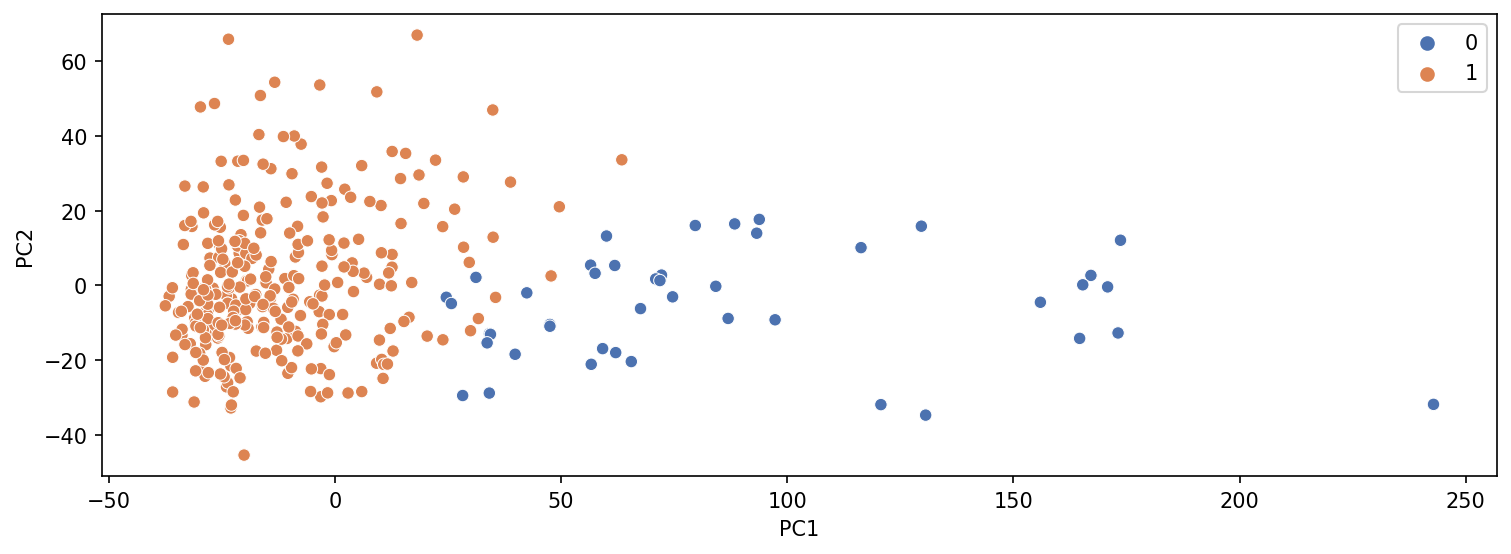

In [22]:
plt.figure(figsize= (12,4) , dpi= 150)

sns.scatterplot(data= pca_df , x = 'PC1' , y= 'PC2' , hue = cluster_labels , palette= 'deep');

In [ ]:
# As as result, KMeans Clustered better. There is 2 group; 1) More Drinkers, 2) Less Drinkers